<a href="https://colab.research.google.com/github/ndamukunda139/data_analysis/blob/main/Mashroom_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC

In [3]:
data = pd.read_csv('/content/mushrooms.csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
#shape of the dataset
data.shape

(8124, 23)

In [5]:
#Check missing values
data.isnull().sum()

,0
class,0
cap-shape,0
cap-surface,0
cap-color,0
bruises,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0


No missing value in the dataset

In [7]:
#Dataset basic info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

#EDA

<ipython-input-26-dbc633182016>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=data, palette=["#DFA99C", "#66B3AF"])


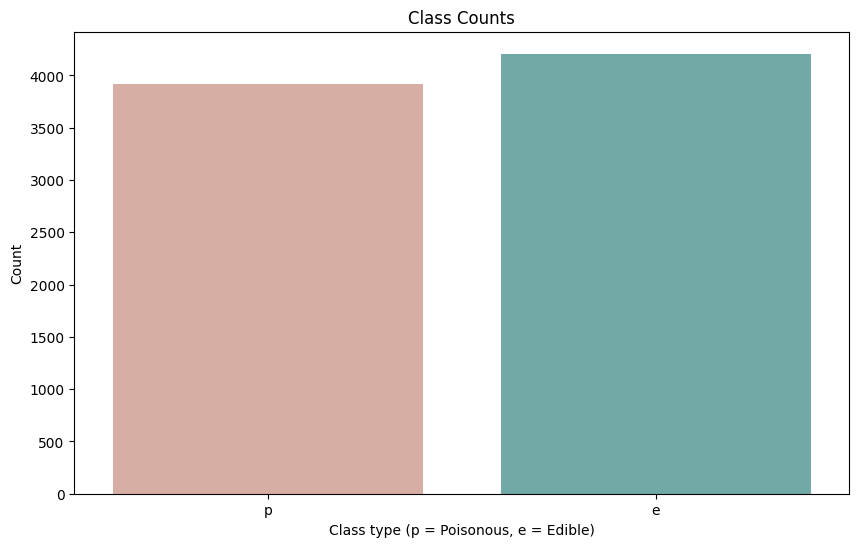

In [26]:
# Class counts
plt.figure(figsize=(10, 6))
sns.countplot(x='class', data=data, palette=["#DFA99C", "#66B3AF"])
plt.title('Class Counts')
plt.xlabel('Class type (p = Poisonous, e = Edible)')
plt.ylabel('Count')
plt.show()

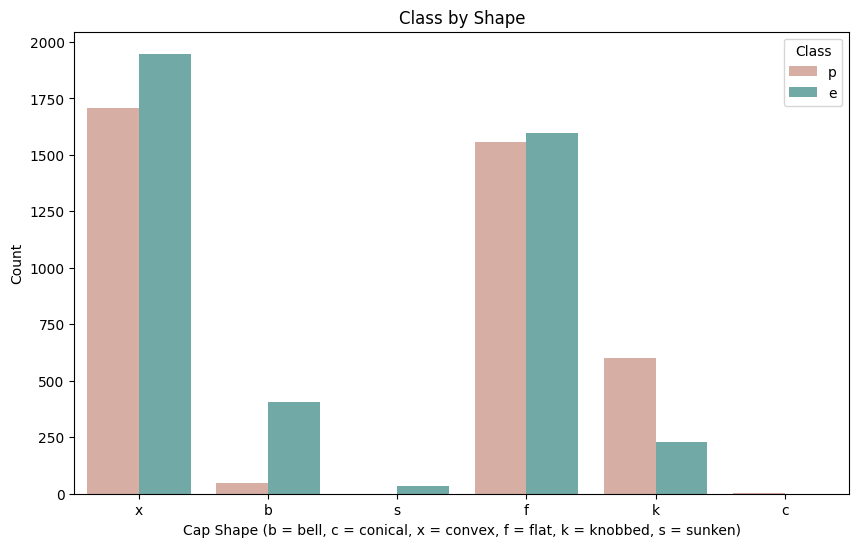

In [29]:
# Shape vs Class relationship
plt.figure(figsize=(10, 6))
sns.countplot(x='cap-shape', hue='class', data=data, palette=["#DFA99C", "#66B3AF"])
plt.title('Class by Shape')
plt.xlabel('Cap Shape (b = bell, c = conical, x = convex, f = flat, k = knobbed, s = sunken)')
plt.ylabel('Count')
plt.legend(title='Class', loc='upper right')
plt.show()

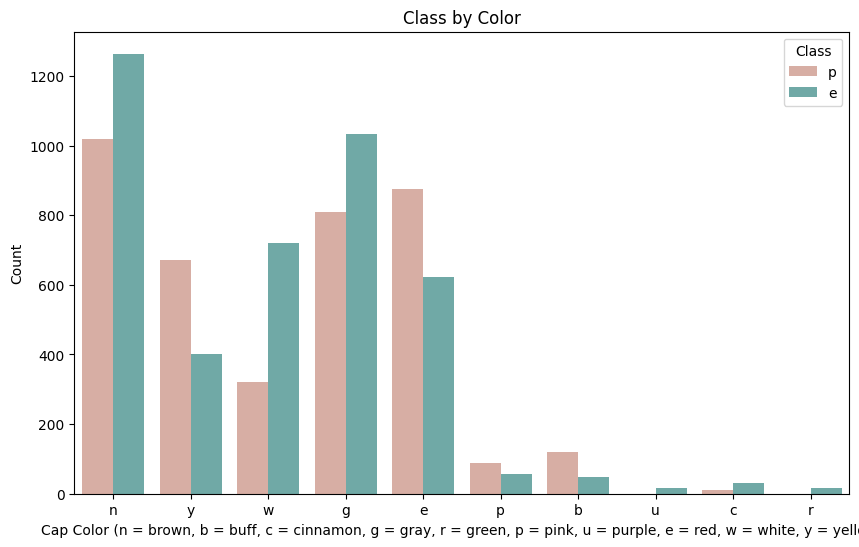

In [32]:
#Class by Color
plt.figure(figsize=(10, 6))
sns.countplot(x='cap-color', hue='class', data=data, palette=["#DFA99C", "#66B3AF"])
plt.title('Class by Color')
plt.xlabel('Cap Color (n = brown, b = buff, c = cinnamon, g = gray, r = green, p = pink, u = purple, e = red, w = white, y = yellow)')
plt.ylabel('Count')
plt.legend(title='Class', loc='upper right')
plt.show()

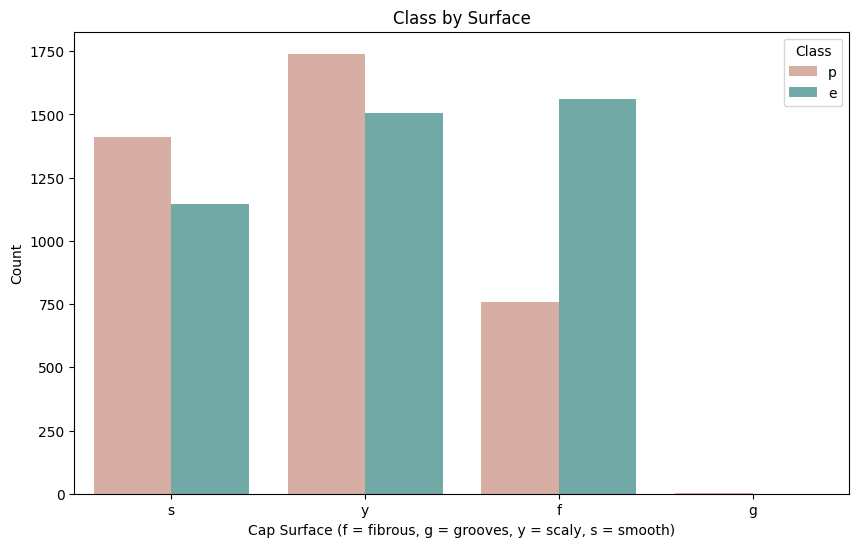

In [31]:
#Class by surface
plt.figure(figsize=(10, 6))
sns.countplot(x='cap-surface', hue='class', data=data, palette=["#DFA99C", "#66B3AF"])
plt.title('Class by Surface')
plt.xlabel('Cap Surface (f = fibrous, g = grooves, y = scaly, s = smooth)')
plt.ylabel('Count')
plt.legend(title='Class', loc='upper right')
plt.show()

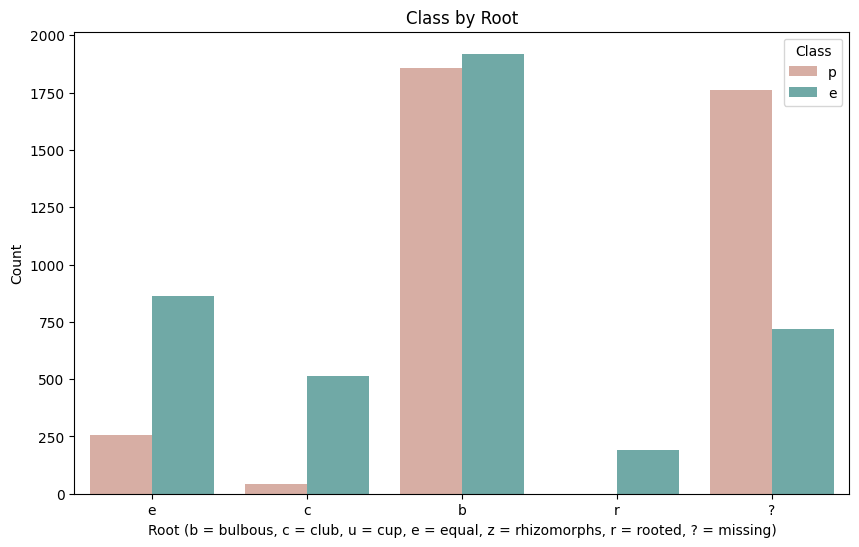

In [33]:
# Class by stalk root
plt.figure(figsize=(10, 6))
sns.countplot(x='stalk-root', hue='class', data=data, palette=["#DFA99C", "#66B3AF"])
plt.title('Class by Root')
plt.xlabel('Root (b = bulbous, c = club, u = cup, e = equal, z = rhizomorphs, r = rooted, ? = missing)')
plt.ylabel('Count')
plt.legend(title='Class', loc='upper right')
plt.show()

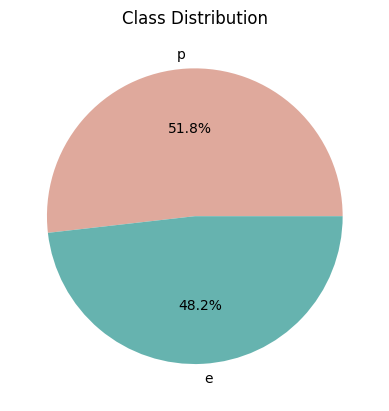

In [36]:
# Class % using pie plot
plt.pie(data['class'].value_counts(), labels=data['class'].unique(), autopct='%1.1f%%', colors=["#DFA99C", "#66B3AF"])
plt.title('Class Distribution')
plt.show()

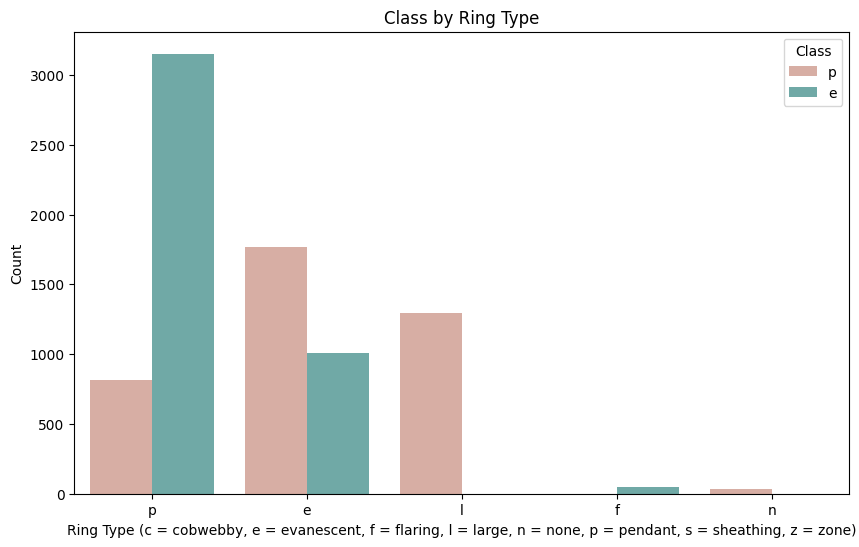

In [37]:
#Class by ring type
plt.figure(figsize=(10, 6))
sns.countplot(x='ring-type', hue='class', data=data, palette=["#DFA99C", "#66B3AF"])
plt.title('Class by Ring Type')
plt.xlabel('Ring Type (c = cobwebby, e = evanescent, f = flaring, l = large, n = none, p = pendant, s = sheathing, z = zone)')
plt.ylabel('Count')
plt.legend(title='Class', loc='upper right')
plt.show()

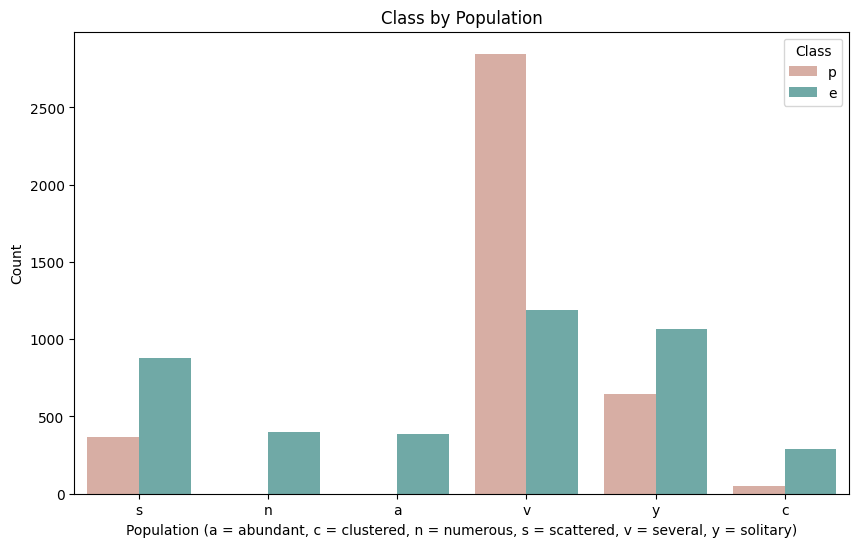

In [38]:
#Class by population
plt.figure(figsize=(10, 6))
sns.countplot(x='population', hue='class', data=data, palette=["#DFA99C", "#66B3AF"])
plt.title('Class by Population')
plt.xlabel('Population (a = abundant, c = clustered, n = numerous, s = scattered, v = several, y = solitary)')
plt.ylabel('Count')
plt.legend(title='Class', loc='upper right')
plt.show()

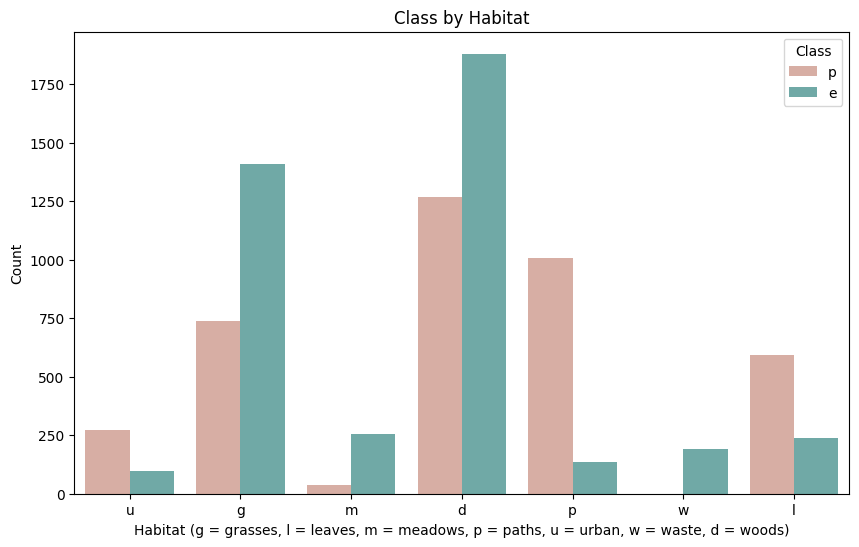

In [39]:
#Class by habitant
plt.figure(figsize=(10, 6))
sns.countplot(x='habitat', hue='class', data=data, palette=["#DFA99C", "#66B3AF"])
plt.title('Class by Habitat')
plt.xlabel('Habitat (g = grasses, l = leaves, m = meadows, p = paths, u = urban, w = waste, d = woods)')
plt.ylabel('Count')
plt.legend(title='Class', loc='upper right')
plt.show()

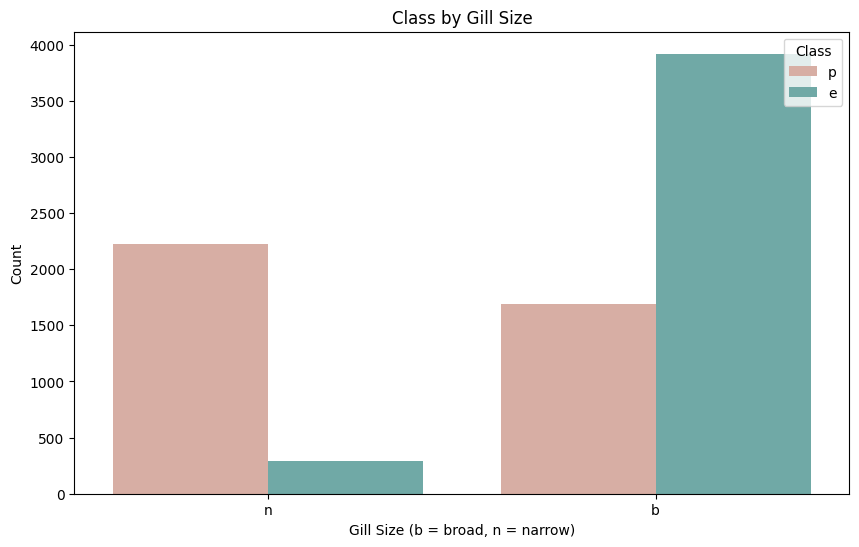

In [40]:
# Class by Gill siz
plt.figure(figsize=(10, 6))
sns.countplot(x='gill-size', hue='class', data=data, palette=["#DFA99C", "#66B3AF"])
plt.title('Class by Gill Size')
plt.xlabel('Gill Size (b = broad, n = narrow)')
plt.ylabel('Count')
plt.legend(title='Class', loc='upper right')
plt.show()


In [55]:
# Transform categorical variables into numerical form
data = data.astype('category')

#Convert categorical features using label encoder
lebel_encoder = LabelEncoder()
for col in data.columns:
    data[col] = lebel_encoder.fit_transform(data[col])
data.head(5)


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [56]:
#Feature selection

data_features = data.columns
data_features

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [57]:
# Define features
y = data['class']
X = data.drop('class', axis=1)

((8124, 22), (8124,))

In [58]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
#Logistic regration
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [84]:
y_Rog_pred = logistic_regression.predict(X_test)

In [85]:
print("Logistic Regression Accuracy : ", accuracy_score(y_test, y_Rog_pred))
print(classification_report(y_test, y_Rog_pred))

print(f"Confusion Matrix : ")
print(confusion_matrix(y_test, y_Rog_pred))

Logistic Regression Accuracy :  0.9476923076923077
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       843
           1       0.94      0.95      0.95       782

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625

Confusion Matrix : 
[[798  45]
 [ 40 742]]


In [74]:
#Decision tree classifier
Decision_Tree = DecisionTreeClassifier(random_state=42)
Decision_Tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [75]:
Decision_Tree_predictions = Decision_Tree.predict(X_test)
print("Decision Tree Accuraccy : ", accuracy_score(y_test, Decision_Tree_predictions))
print(classification_report(y_test, Decision_Tree_predictions))

Decision Tree Accuraccy :  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [77]:
#Random forest Classifier
Random_Forest = RandomForestClassifier(n_estimators=100, random_state=42)
Random_Forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [78]:
y_RF_pred = Random_Forest.predict(X_test)

In [79]:
print("Random Forest Accuracy : ", accuracy_score(y_test, y_RF_pred))
print(classification_report(y_test, y_RF_pred))

print(f"Confusion Matrix : ")
print(confusion_matrix(y_test, y_RF_pred))

Random Forest Accuracy :  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Confusion Matrix : 
[[843   0]
 [  0 782]]


In [71]:
#SVM
# Train the SVM model with a linear kernel
#svm_model_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')

svm_model = SVC(kernel='linear', C=1.0)  # Linear kernel
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [72]:
# Make predictions
y_SVM_pred = svm_model.predict(X_test)

In [73]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_SVM_pred))
print("Classification Report:\n", classification_report(y_test, y_SVM_pred))

Accuracy: 0.9729230769230769
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97       843
           1       0.98      0.96      0.97       782

    accuracy                           0.97      1625
   macro avg       0.97      0.97      0.97      1625
weighted avg       0.97      0.97      0.97      1625



<ipython-input-82-dd5baab92e09>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')


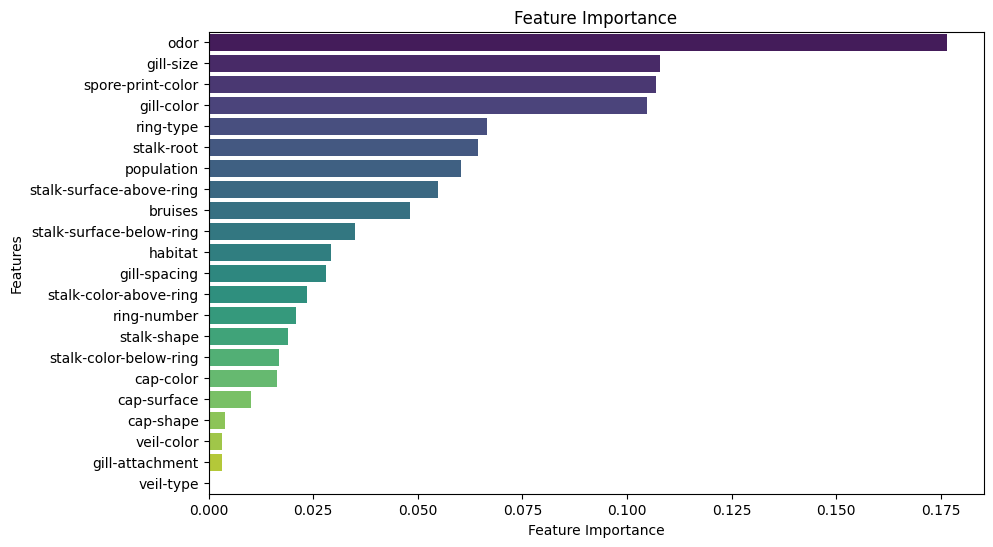

In [82]:
#Feature importance
feature_importances = pd.Series(Random_Forest.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()
